In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data
df = pd.read_excel(r"/home/lenovo/Documents/data_science/data_sci/data/Online Retail Data Set.xlsx")

#df = pd.read_excel(r"/home/lenovo/Documents/data_science/data/Online Retail Data Set.xlsx")
df.head(11)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [25]:
print(df.shape, "\n", df.columns, "\n", df.dtypes)

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])


(541909, 8) 
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object') 
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [28]:
print(df.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [29]:
df.duplicated().sum()

np.int64(5268)

/tmp/ipykernel_5465/3887259963.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="Blues_r", ax=axes[1,0])
/tmp/ipykernel_5465/3887259963.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_demand.values, y=country_demand.index, palette="viridis", ax=axes[1,1])


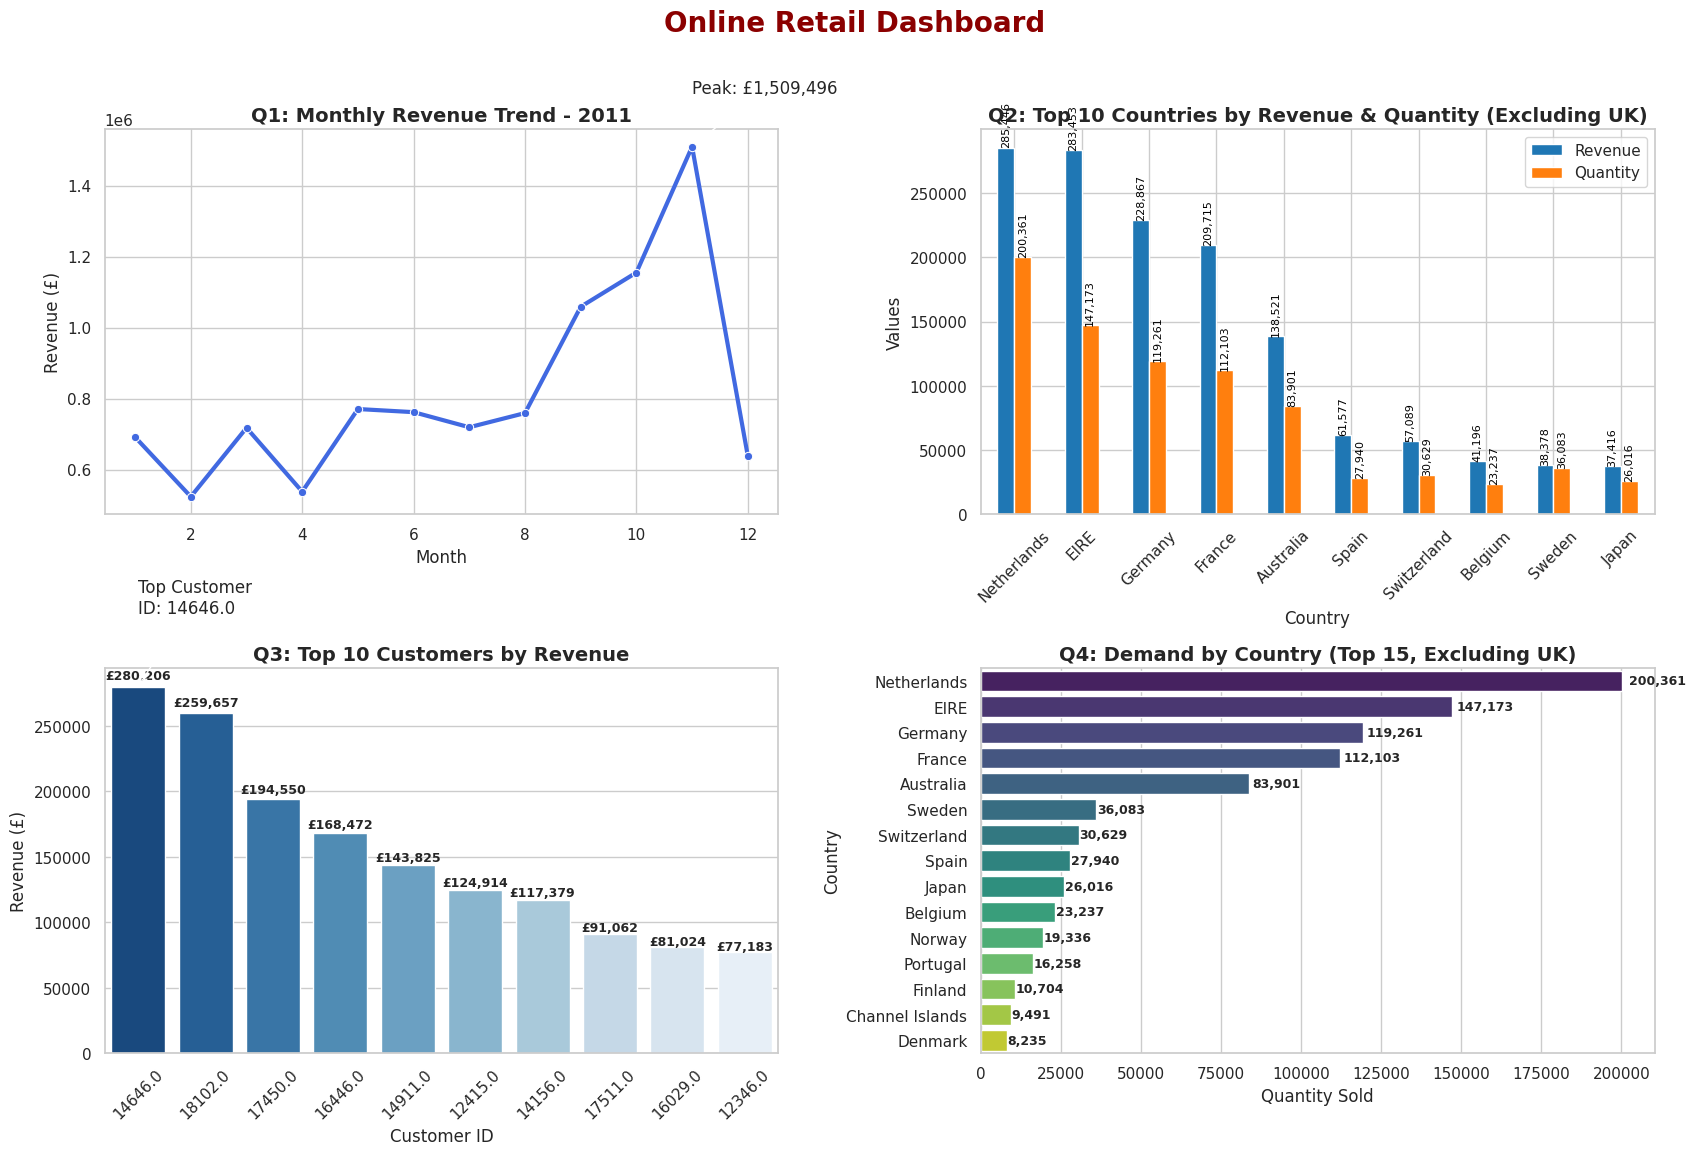

In [32]:


# --- Data Cleanup ---
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Apply style
sns.set_theme(style="whitegrid")

# Create Figure with Subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- Q1: CEO - Monthly Revenue 2011 ---
df_2011 = df[df['InvoiceDate'].dt.year == 2011]
monthly_revenue = df_2011.groupby(df_2011['InvoiceDate'].dt.month)['Revenue'].sum()

sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values,
             marker="o", linewidth=3, color="royalblue", ax=axes[0,0])
axes[0,0].set_title("Q1: Monthly Revenue Trend - 2011", fontsize=14, fontweight="bold")
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Revenue (£)")
# Highlight max revenue month
max_month = monthly_revenue.idxmax()
max_value = monthly_revenue.max()
axes[0,0].annotate(f"Peak: £{max_value:,.0f}", 
                   xy=(max_month, max_value),
                   xytext=(max_month, max_value*1.1),
                   arrowprops=dict(facecolor='black', arrowstyle="->"))

# --- Q2: CMO - Top 10 Countries (exclude UK) ---
country_data = df[df['Country'] != 'United Kingdom'].groupby('Country').agg(
    Revenue=('Revenue','sum'),
    Quantity=('Quantity','sum')
).sort_values('Revenue', ascending=False).head(10)

country_data.plot(kind='bar', ax=axes[0,1], color=["#1f77b4","#ff7f0e"])
axes[0,1].set_title("Q2: Top 10 Countries by Revenue & Quantity (Excluding UK)", fontsize=14, fontweight="bold")
axes[0,1].set_ylabel("Values")
axes[0,1].tick_params(axis='x', rotation=45)

# Add value labels
for p in axes[0,1].patches:
    axes[0,1].annotate(f"{int(p.get_height()):,}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=8, color='black', rotation=90)

# --- Q3: CMO - Top 10 Customers by Revenue ---
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="Blues_r", ax=axes[1,0])
axes[1,0].set_title("Q3: Top 10 Customers by Revenue", fontsize=14, fontweight="bold")
axes[1,0].set_xlabel("Customer ID")
axes[1,0].set_ylabel("Revenue (£)")
axes[1,0].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(top_customers.values):
    axes[1,0].text(i, v + (0.02*v), f"£{int(v):,}", ha='center', fontsize=9, fontweight="bold")

# Highlight top customer
axes[1,0].annotate(f"Top Customer\nID: {top_customers.index[0]}", 
                   xy=(0, top_customers.values[0]),
                   xytext=(0, top_customers.values[0]*1.2),
                   arrowprops=dict(facecolor='black', arrowstyle="->"))

# --- Q4: CEO - Demand by Country (exclude UK) ---
country_demand = df[df['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(15)

sns.barplot(x=country_demand.values, y=country_demand.index, palette="viridis", ax=axes[1,1])
axes[1,1].set_title("Q4: Demand by Country (Top 15, Excluding UK)", fontsize=14, fontweight="bold")
axes[1,1].set_xlabel("Quantity Sold")
axes[1,1].set_ylabel("Country")

# Add value labels
for i, v in enumerate(country_demand.values):
    axes[1,1].text(v + (0.01*v), i, f"{int(v):,}", va='center', fontsize=9, fontweight="bold")

# Save Dashboard as Image
plt.suptitle("Online Retail Dashboard", fontsize=20, fontweight="bold", color="darkred")
plt.savefig("retail_dashboard_improved.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_5465/986999088.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="Blues_r", ax=axes[1,0])
/tmp/ipykernel_5465/986999088.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_demand.values, y=country_demand.index, palette="viridis", ax=axes[1,1])


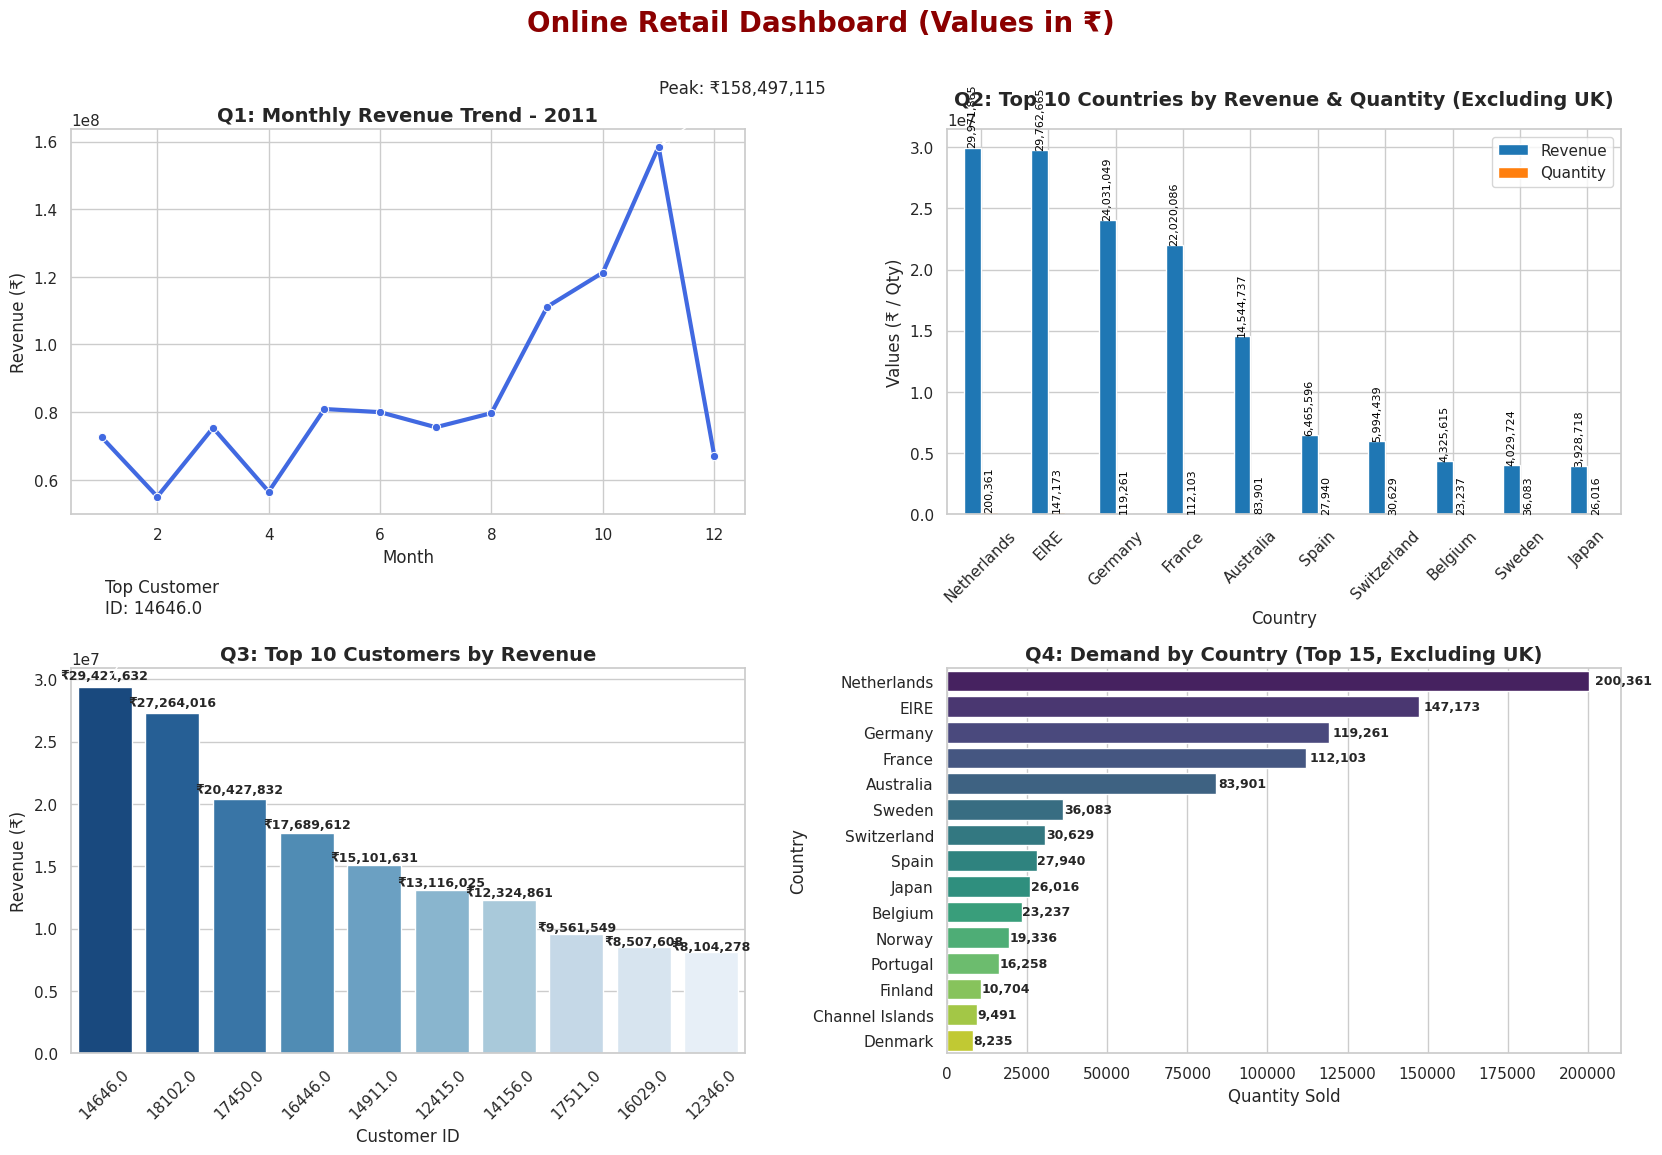

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Conversion Rate (GBP → INR) ---
GBP_TO_INR = 105  # you can update this based on live rate

# --- Data Cleanup ---
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['Revenue'] = df['Quantity'] * df['UnitPrice'] * GBP_TO_INR   # convert to INR
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Apply style
sns.set_theme(style="whitegrid")

# Create Figure with Subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- Q1: CEO - Monthly Revenue 2011 ---
df_2011 = df[df['InvoiceDate'].dt.year == 2011]
monthly_revenue = df_2011.groupby(df_2011['InvoiceDate'].dt.month)['Revenue'].sum()

sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values,
             marker="o", linewidth=3, color="royalblue", ax=axes[0,0])
axes[0,0].set_title("Q1: Monthly Revenue Trend - 2011", fontsize=14, fontweight="bold")
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Revenue (₹)")
# Highlight max revenue month
max_month = monthly_revenue.idxmax()
max_value = monthly_revenue.max()
axes[0,0].annotate(f"Peak: ₹{max_value:,.0f}", 
                   xy=(max_month, max_value),
                   xytext=(max_month, max_value*1.1),
                   arrowprops=dict(facecolor='black', arrowstyle="->"))

# --- Q2: CMO - Top 10 Countries (exclude UK) ---
country_data = df[df['Country'] != 'United Kingdom'].groupby('Country').agg(
    Revenue=('Revenue','sum'),
    Quantity=('Quantity','sum')
).sort_values('Revenue', ascending=False).head(10)

country_data.plot(kind='bar', ax=axes[0,1], color=["#1f77b4","#ff7f0e"])
axes[0,1].set_title("Q2: Top 10 Countries by Revenue & Quantity (Excluding UK)", fontsize=14, fontweight="bold")
axes[0,1].set_ylabel("Values (₹ / Qty)")
axes[0,1].tick_params(axis='x', rotation=45)

# Add value labels
for p in axes[0,1].patches:
    axes[0,1].annotate(f"{int(p.get_height()):,}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=8, color='black', rotation=90)

# --- Q3: CMO - Top 10 Customers by Revenue ---
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="Blues_r", ax=axes[1,0])
axes[1,0].set_title("Q3: Top 10 Customers by Revenue", fontsize=14, fontweight="bold")
axes[1,0].set_xlabel("Customer ID")
axes[1,0].set_ylabel("Revenue (₹)")
axes[1,0].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(top_customers.values):
    axes[1,0].text(i, v + (0.02*v), f"₹{int(v):,}", ha='center', fontsize=9, fontweight="bold")

# Highlight top customer
axes[1,0].annotate(f"Top Customer\nID: {top_customers.index[0]}", 
                   xy=(0, top_customers.values[0]),
                   xytext=(0, top_customers.values[0]*1.2),
                   arrowprops=dict(facecolor='black', arrowstyle="->"))

# --- Q4: CEO - Demand by Country (exclude UK) ---
country_demand = df[df['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(15)

sns.barplot(x=country_demand.values, y=country_demand.index, palette="viridis", ax=axes[1,1])
axes[1,1].set_title("Q4: Demand by Country (Top 15, Excluding UK)", fontsize=14, fontweight="bold")
axes[1,1].set_xlabel("Quantity Sold")
axes[1,1].set_ylabel("Country")

# Add value labels
for i, v in enumerate(country_demand.values):
    axes[1,1].text(v + (0.01*v), i, f"{int(v):,}", va='center', fontsize=9, fontweight="bold")

# Save Dashboard as Image
plt.suptitle("Online Retail Dashboard (Values in ₹)", fontsize=20, fontweight="bold", color="darkred")
plt.savefig("retail_dashboard_inr.png", dpi=300, bbox_inches="tight")
plt.show()
